
# BMIS-2542: Data Programming with Python 
##### Katz Graduate School of Business, Fall 2019


## Session 10: Natural Language Processing (NLP) with Python<br>


### Text Classification

Classification is the task of choosing the correct class label for a given input. [Sentiment Analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) is a special case of text classification, that deals with categorizing **opinions** expressed in text (e.g., movie reviews, product reviews, complaints) especially in order to determine whether the writer's attitude towards a particular topic/subject (e.g., movie, product) belongs to predefined categories (positive/negative/neutral, complaint/not-complaint, happy/angry/other).


A classifier is called **supervised** if it is built based on training corpora containing the correct label for each input. The framework used by supervised classification is shown in the following image. 

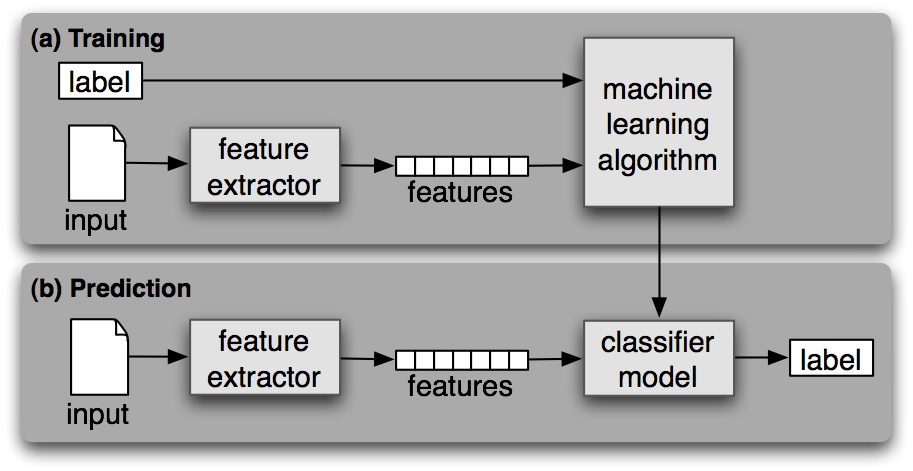
<center>Supervised Classification [(Source)](https://www.nltk.org/book/ch06.html)</center>

### Sentiment Analysis with scikit-learn

#### Trying out CountVectorizer & TF-IDF

In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [3]:
sents = ['A rose is a rose is a rose is a rose.',
         'Oh, what a fine day it is.',
        "It ain't over till it's over, I tell you!!"]

In [4]:
# Initialize a CoutVectorizer to use NLTK's tokenizer instead of its 
# default one (which ignores punctuation and stopwords). 
# Minimum document frequency set to 1. 
foovec = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)

In [5]:
# sents turned into sparse vector of word frequency counts
sents_counts = foovec.fit_transform(sents)
# foovec now contains vocab dictionary which maps unique words to indexes
foovec.vocabulary_

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Sunny/nltk_data'
    - 'C:\\Users\\Sunny\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Sunny\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Sunny\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Sunny\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [6]:
# sents_counts has a dimension of 3 (document count) by 19 (# of unique words)
sents_counts.shape

NameError: name 'sents_counts' is not defined

In [ ]:
# this vector is small enough to view in full! 
sents_counts.toarray()

In [ ]:
# Convert raw frequency counts into TF-IDF (Term Frequency -- Inverse Document Frequency) values
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
sents_tfidf = tfidf_transformer.fit_transform(sents_counts)
sents_tfidf.shape

In [ ]:
# TF-IDF values
# raw counts have been normalized against document length, 
# terms that are found across many docs are weighted down
sents_tfidf.toarray()

### Movie Review Sentiment Analysis with scikit-learn

#### Using a Custom Stopwords List

In [ ]:
custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append(line.strip())
print("Stopword list has {0} entries".format(len(custom_stop_words)))

#### Loading the Movie Review Corpus

In [ ]:
import sklearn
from sklearn.datasets import load_files

In [ ]:
# loading all files as training data. 
movie_train = load_files('movie_reviews', shuffle=True)

In [ ]:
len(movie_train.data)

In [ ]:
# target names ("classes") are automatically generated from subfolder names
movie_train.target_names

In [ ]:
# First file seems to be about a Schwarzenegger movie. 
movie_train.data[0][:500]

In [ ]:
# first file is in "neg" folder
movie_train.filenames[0]

In [ ]:
# first file is a negative review and is mapped to 0 index 'neg' in target_names
movie_train.target[0]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# initialize movie_vector object, and then turn movie train data into a vector 
movie_vec = CountVectorizer(min_df=2, stop_words=custom_stop_words, ngram_range=(1,2))         
# movie_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features = 3000) # use top 3000 words only. 

movie_counts = movie_vec.fit_transform(movie_train.data)

In [ ]:
# 'screen' is found in the corpus, mapped to index 56538
movie_vec.vocabulary_.get('screen')

In [ ]:
# 2,000 documents, 73K unique terms. 
movie_counts.shape

In [ ]:
# Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()
movie_tfidf = tfidf_transformer.fit_transform(movie_counts)

In [ ]:
# Same dimensions, now with tf-idf values instead of raw frequency counts
movie_tfidf.shape

#### Training a Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

docs_train, docs_test, y_train, y_test = train_test_split(movie_tfidf, movie_train.target, test_size = 0.20, random_state = 12)

In [ ]:
clf = MultinomialNB().fit(docs_train, y_train)

In [ ]:
# Predicting the Test set results, find accuracy
y_pred = clf.predict(docs_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

In [ ]:
# classification_report for the NB Classifier
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

#### Training a Linear SVM Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

clf_SVM = SGDClassifier(loss='hinge', penalty='l2',
                        alpha=1e-3, random_state=42,
                        max_iter=5, tol=None).fit(docs_train, y_train)

In [ ]:
# Predicting the Test set results, find accuracy
y_pred_SVM = clf_SVM.predict(docs_test)
sklearn.metrics.accuracy_score(y_test, y_pred_SVM)

In [ ]:
# classification_report for the linear SVM NB Classifier
print(metrics.classification_report(y_test, y_pred_SVM))

#### Testing Classifier on Fake Movie Reviews

In [ ]:
# very short and fake movie reviews
reviews_new = ['This movie was excellent', 'Absolute joy ride', 
               'Steven Seagal was terrible', 'Steven Seagal shined through.', 
               'This was certainly a movie', 'Two thumbs up', 'I fell asleep halfway through', 
               "We can't wait for the sequel!!", 'I cannot recommend this highly enough', 
               'instant classic.', 'Steven Seagal was amazing. His performance was Oscar-worthy.']
reviews_new_counts = movie_vec.transform(reviews_new)
reviews_new_tfidf = tfidf_transformer.transform(reviews_new_counts)

In [ ]:
# have classifier make a prediction
pred = clf_SVM.predict(reviews_new_tfidf)

In [ ]:
# print out results
for review, category in zip(reviews_new, pred):
    print('{0} => {1}'.format(review, movie_train.target_names[category]))

Classifiers tend to have many parameters as well; e.g., `MultinomialNB` includes a smoothing parameter `alpha` and `SGDClassifier` has a penalty parameter `alpha` and configurable `loss` and `penalty terms` in the objective function.<br>
Instead of tweaking the parameters of the various components of the chain, it is possible to run an exhaustive search of the best parameters on a grid of possible values. This is called **Grid Search**.

As an exercise, see whether you can perform grid search for the above classifiers to choose the best parameters for them.
Here are some links that you may find useful.

  - [Working with Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
  - [Tuning Hyperparameters of an Estimator](https://scikit-learn.org/stable/modules/grid_search.html)